In [1]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
adv = pd.read_csv("https://raw.githubusercontent.com/shaik4182/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/Advertising.csv")

In [3]:
adv.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
adv.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
adv.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

In [7]:
x_TV = adv[['TV']]

In [8]:
x_TV.shape

(200, 1)

In [9]:
x_TV.head(2)

,TV
0,230.1
1,44.5


In [62]:
y_sales = adv['Sales']

In [63]:
y_sales.shape

(200,)

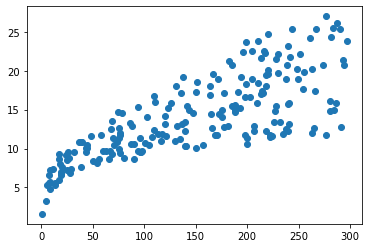

In [64]:
plt.scatter(x_TV,y_sales)

In [65]:
slr = LinearRegression(normalize=True)

In [66]:
slr.fit(x_TV,y_sales)  ## simple regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [67]:
slope = slr.coef_   # slope
slope

array([0.04753664])

In [68]:
intercept = slr.intercept_
intercept

7.032593549127695

In [69]:
slr.predict([[230.1]])  # actual value =22.1 E= 22.1-17.97

array([17.97077451])

In [70]:
slr.score(x_TV,y_sales)

0.611875050850071

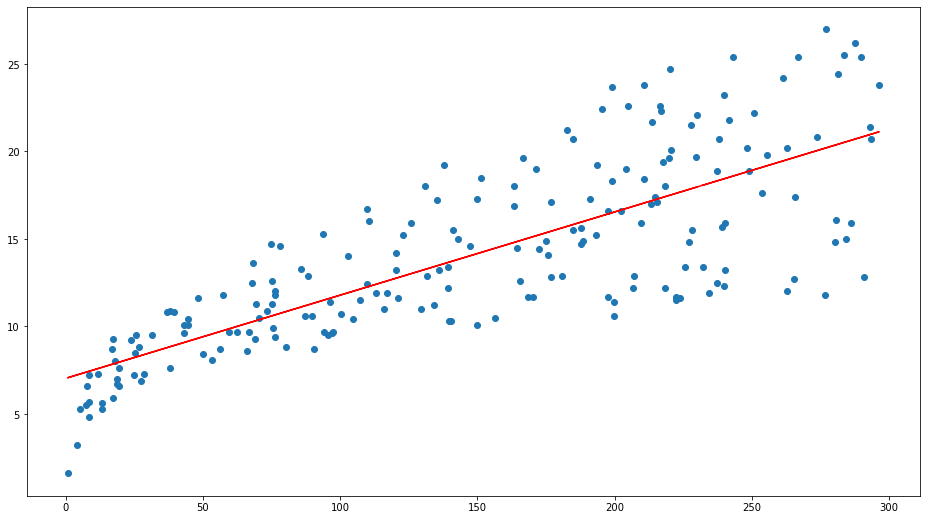

In [71]:
plt.figure(figsize=(16,9))
plt.scatter(x_TV,y_sales)
plt.plot(x_TV,slr.intercept_+slr.coef_*x_TV,'r')

In [72]:
mlr_data = adv.drop(["Sales","Unnamed: 0"],axis=1)

In [73]:
mlr_data .head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [74]:
y_sales.head(3)

0    22.1
1    10.4
2     9.3
Name: Sales, dtype: float64

In [75]:
mlr = LinearRegression()

In [76]:
mlr.fit(mlr_data,y_sales) # multiple regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
mlr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [78]:
mlr.intercept_

2.938889369459412

In [79]:
mlr.predict([[230.1,37.8,69.2]])  # 22.1

array([20.52397441])

In [80]:
mlr.score(mlr_data,y_sales)

0.8972106381789521

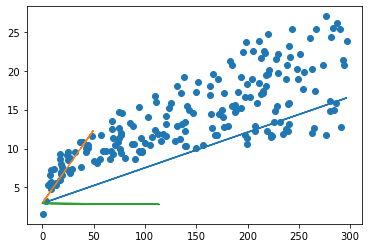

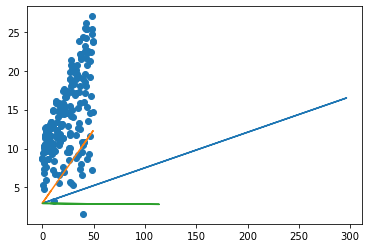

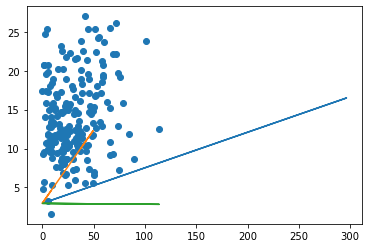

In [81]:
for i in mlr_data.columns:
    plt.scatter(mlr_data[i],y_sales)
    plt.plot(mlr_data,mlr.intercept_+mlr.coef_*mlr_data)
    plt.show()

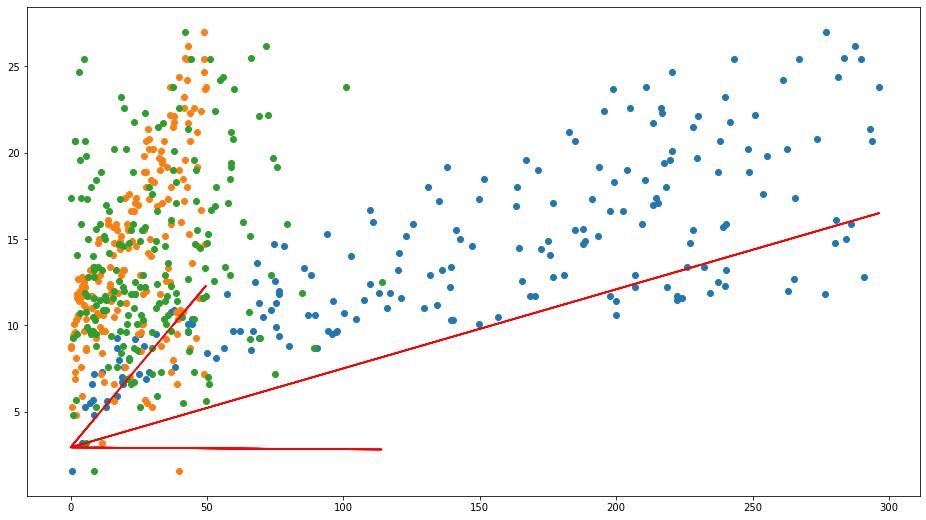

In [83]:
plt.figure(figsize=(16,9))
for i in mlr_data.columns:
    plt.scatter(mlr_data[i],y_sales)
    plt.plot(mlr_data,mlr.intercept_+mlr.coef_*mlr_data,'r')

## Training and Testing

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = adv.drop(["Sales","Unnamed: 0"],axis=1)

In [33]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [34]:
x.shape

(200, 3)

In [35]:
y = adv['Sales']

In [36]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [37]:
y.shape

(200,)

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y)

In [91]:
X_train.shape

(150, 3)

In [92]:
Y_train.shape

(150,)

In [93]:
X_test.shape

(50, 3)

In [94]:
Y_test.shape

(50,)

In [95]:
Train_data=pd.DataFrame(X_train)
Train_data.head(3)

,TV,Radio,Newspaper
8,8.6,2.1,1.0
70,199.1,30.6,38.7
81,239.8,4.1,36.9


In [96]:
Train_data['Sales']=Y_train

In [97]:
Train_data.head(3)

,TV,Radio,Newspaper,Sales
8,8.6,2.1,1.0,4.8
70,199.1,30.6,38.7,18.3
81,239.8,4.1,36.9,12.3


In [98]:
Y_test.shape

(50,)

In [99]:
Test_Data = pd.DataFrame(X_test)
Test_Data.head(3)

,TV,Radio,Newspaper
91,28.6,1.5,33.0
121,18.8,21.7,50.4
103,187.9,17.2,17.9


In [100]:
Test_Data["Sales"]=Y_test
Test_Data.head(2)

,TV,Radio,Newspaper,Sales
91,28.6,1.5,33.0,7.3
121,18.8,21.7,50.4,7.0


In [101]:
Model = LinearRegression()

In [102]:
Model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
Model.score(X_train,Y_train)

1.0

In [104]:
Model.score(X_test,Y_test)

1.0

In [105]:
New_prediction = Model.predict(X_test)
New_prediction

array([ 7.3,  7. , 14.7, 10.6, 14.6, 14. ,  9.4, 22.6, 18.5, 18. , 15.5,
       12. , 14.8, 17.4, 15.5, 15.7, 17.1, 12.6, 18.4,  5.6,  8.7, 16.9,
       14.4, 16.6, 11.3, 11.2, 12.6, 13.3, 15. ,  9.3, 17.6,  7.2, 24.7,
       19.7, 10.4, 23.2,  9.7,  1.6, 16.7, 12.5,  9.9,  5.3, 18. , 15. ,
        9.5,  3.2, 14.7, 16.1, 16. , 11.4])

In [106]:
from sklearn import metrics

In [131]:
Results =pd.DataFrame({"Actual_Data":Y_test,
              "New_Predication":New_prediction,
              "Mean_Square_error":(Y_test-New_prediction)**2,
              "Mean_Abl_Error":(Y_test-New_prediction)
                      })

In [132]:
Results.head()

,Actual_Data,New_Predication,Mean_Square_error,Mean_Abl_Error
91,7.3,7.3,0.000000e+00,0.000000e+00
121,7.0,7.0,6.389773e-29,-7.993606e-15
103,14.7,14.7,3.155444e-30,1.776357e-15
125,10.6,10.6,0.000000e+00,0.000000e+00
114,14.6,14.6,2.839899e-29,-5.329071e-15


In [133]:
Results.Mean_Square_error.mean()

3.4616202597229525e-29

In [128]:
print("MAE",metrics.mean_absolute_error(Y_test,New_prediction))

MAE 4.11670697531008e-15


In [125]:
print("Mean_Square_error",metrics.mean_squared_error(Y_test,New_prediction))

Mean_Square_error 3.4616202597229525e-29


In [126]:
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,New_prediction)))

RMSE 5.8835535688246715e-15
